#### Implementation of MBR for results
Using the data obtained and the previously made code, we can develop a code to visualize the MBR through time. For this, we use the scaffold already made with the Ornstein-Uhlenbeck system, in Julia. For this we call instead the data from the results.

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# From the data of the simulation, the only thing that is essential for the MBR is the total time, as it can be mapped with respect of the frame number
tot_time = 30

# Import the data of trayectories
direction_results = r"./results/" + "results_1000_trap.csv"
data = pd.read_csv(direction_results)

We can then extract the information corresponding to each run as: data[data["run_number"] == i], where i is the run number, which we should note goes from 1 to the total number of runs.

We can do 2 different things in order to analyze the data:
 - Consider each axis independently, as if the particle where subject of 2 independent traps in each axis
 - Calculate the position r, in relation with the center of the trap (as the intial position of the particle is in the middle of the trap, then one can make a translation so that the r value reflects the displacement from the trap)

In this case, the correct approach should be the position, as the trap* is radial rather than in the 2 axes.

*To confirm

In [26]:
tot_runs = max(data["run_number"])
tot_frames = len(data["frame"].tolist())/tot_runs # The total lenght of the frames, over the amount of runs as this is repeated tot_runs times

# Map the time (secs) to the frames - frames start in 0
time_per_frame = tot_time / tot_frames
time_array = np.linspace(0, int(tot_time), int(tot_frames))

We can visualize the raw trayectories to see how the runs generated

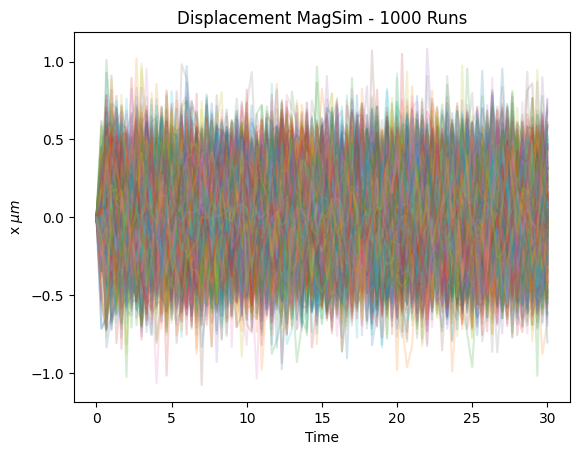

In [31]:
for i in range(tot_runs):
    part = data[data["run_number"] == i + 1]
    # if not part.empty:
        # print("ok")
    
    # Calculation of position
    x_part = np.array(part.x_pos.tolist())
    x_part = x_part - x_part[0]
    
    plt.plot(time_array, x_part, alpha=0.2)

plt.title("Displacement MagSim - 1000 Runs")
plt.xlabel("Time")
plt.ylabel(r"x $\mu{}m$")
plt.show()

We can see the probability dirstibution of the particle's position, as it can give us information of the type of system that we have.

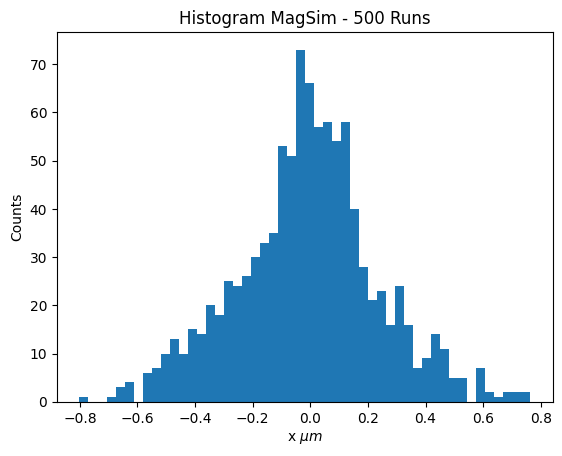

In [ ]:
x_fin = np.zeros(tot_runs)
t_hist = -1

for i in range(tot_runs):
    part = data[data["run_number"] == i + 1]
    x_part = np.array(part.x_pos.tolist())
    x_part = x_part - x_part[0]
    x_fin[i] = x_part[t_hist]


plt.hist(x_fin, bins=50)
plt.title("Histogram MagSim - 1000 Runs")
plt.xlabel(r"x $\mu{}m$")
plt.ylabel(r"Counts")
plt.show()

We select then the time stamps for which the analysis of the MBR will be made, and perform the whole process.

-0.36225032806396307


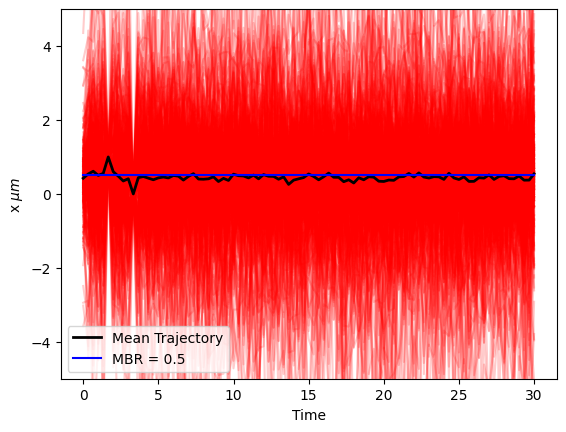

Timestamp 1: 1.6666666666666665 secs
Timestamp 2: 3.333333333333333 secs


In [29]:
t1_ind = 5
t2_ind = 10

all_MBR = []

for i in range(tot_runs):
    part = data[data["run_number"] == i + 1]
    # if not part.empty:
        # print("ok")
    
    # Calculation of position
    x_part = np.array(part.x_pos.tolist())
    
    r_0 = x_part[t2_ind]
    d = x_part[t2_ind] - x_part[t1_ind]
    if i == 0: print(d)
    if d > 0.075: # condition 
        MBR_calc = -(x_part - r_0) / d
        all_MBR.append(MBR_calc)
        plt.plot(time_array, MBR_calc, color = "red", alpha=0.2)
        
if all_MBR:
    mean_MBR = np.mean(all_MBR, axis=0)
    plt.plot(time_array, mean_MBR, color="black", linewidth=2, label="Mean Trajectory")
    plt.plot(time_array, np.ones(len(time_array))*0.5, color = "blue", label="MBR = 0.5")
ax = plt.gca()
ax.set_ylim([-5, 5])
plt.xlabel("Time")
plt.ylabel(r"x $\mu{}m$")
plt.legend()
plt.show()
print("Timestamp 1:", time_array[t1_ind], "secs")
print("Timestamp 2:", time_array[t2_ind], "secs")

In [30]:
part = data[data["run_number"] == 1]
dt = tot_time/tot_frames